In [1]:
# Installations:
"""
pandas
openpyxl
pyarrow
"""

'\npandas\nopenpyxl\npyarrow\n'

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# Variables
filename = 'time_series_data.parquet'
datetime = 'DateTime'
tagname = 'TagName'
value = 'Value'
aggr_freq_l1 = '10s'
bar_angle = 'Bar Angle'
pressure = 'Pressure'
height = 'RS4R4 Height'
col_name = [bar_angle, pressure, height]

In [82]:
def reads_parquet(filename:str) -> pd.DataFrame:
    try:
        df = pd.read_parquet(filename)
        print("df.shape: ", df.shape)
        return df
    except Exception as e:
        print(f"Exceoption: {e} occurred")
        raise e

In [83]:
def drops_null(df: pd.DataFrame) -> pd.DataFrame:   
    if df.empty:
        print("Dataframe is empty")
        return None
    elif df.isnull().sum().sum() > 0:
        try:
            print("Before null removal, df.shape: ", df.shape)
            df = df.dropna() #.reset_index(drop=True)
            print("After null removal, df.shape: ", df.shape)
            return df
        except Exception as e:
            print(f"Exceoption: {e} occurred")
            raise e
    else:
        return df

def drops_duplicate(df: pd.DataFrame) -> pd.DataFrame:  
    if df.empty:
        print("Dataframe is empty")
        return None
    elif df.duplicated().sum() > 0:
        try:
            print("Before duplicate removal, df.shape: ", df.shape)
            df = df.drop_duplicates(subset=[datetime, tagname]) #.reset_index(drop=True)
            print("After duplicate removal, df.shape: ", df.shape)
            return df
        except Exception as e:
            print(f"Exceoption: {e} occurred")
            raise e
    else:
        return df

In [84]:
def check_nulls_in_col(df:pd.DataFrame) -> list:
    if not df.empty:
        return [(x,y) for x, y in zip(df.isnull().sum().keys(), df.isnull().sum()) if y != 0]
    else:
        print("pass correct dataframe")
        pass

def check_nulls_plot(df:pd.DataFrame):
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [85]:
def pivots_data(df:pd.DataFrame) -> pd.DataFrame:
    try:
        print("Before pivot, df.shape: ", df.shape)
        df_pivot = df.pivot(index=datetime, columns=tagname, values=value).reset_index().copy()
        print("After pivot, df.shape: ", df_pivot.shape)
        return df_pivot
    except Exception as e:
        print(f"Exceoption: {e} occurred")
        raise e

In [86]:
def groups_data(df:pd.DataFrame, aggr_freq_l1:str) -> pd.DataFrame:
    try:
        print("Before grouping, df.shape: ", df.shape)
        df_grouped = df.groupby([pd.Grouper(key=datetime, freq=aggr_freq_l1)]).mean()
        print("After grouping, df.shape: ", df_grouped.shape)
        return df_grouped
    except Exception as e:
        print(f"Exceoption: {e} occurred")
        raise e

In [121]:
def drops_col(df:pd.DataFrame, col_name:list) -> pd.DataFrame:
    try:
        if len(col_name) == 1:
            if col_name[0] in df.columns:
                print("Before dropping columns, df.shape: ", df.shape)
                df = df.drop(columns=col_name, axis=1)
                print(f"{col_name} columns are dropped.")
                print("After dropping columns, df.shape: ", df.shape)
                return df
            else:
                print(f"{col_name[0]} not found in dataframe")
        else:
            if np.sum([True if x in df.columns else False for x in col_name]) == len(col_name):
                print("Before dropping columns, df.shape: ", df.shape)
                df = df.drop(columns=col_name, axis=1)
                print(f"{col_name} columns are dropped.")
                print("After dropping columns, df.shape: ", df.shape)
                return df
            else:
                print(f"Either 1 or more columns not found in dataframe")
    except Exception as e:
        print(e)
        raise e

In [118]:
def plots_corr(df:pd.DataFrame):
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(3, 1.5))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

In [129]:
def plots_timeseries_data(df:pd.DataFrame, col_name:list, time_axis:str):
    # Loop through each column, plot its values over time
    fig, axs = plt.subplots(len(col_name), 1, figsize=(12,len(col_name)*2.5))
    for i, column in enumerate(col_name):
        df.plot(time_axis, column, ax=axs[i])
    # Adjust the spacing between the plots
    plt.subplots_adjust(hspace=0.755)
    plt.show()

df.shape:  (712070, 3)
Before null removal, df.shape:  (712070, 3)
After null removal, df.shape:  (712069, 3)


,DateTime,TagName,Value
0,2023-10-05,Pressure,60.862499
1,2023-10-05,Bar Angle,38.530838


Before pivot, df.shape:  (712069, 3)
After pivot, df.shape:  (671761, 4)
[('Bar Angle', 431443), ('Pressure', 440320), ('RS4R4 Height', 431451)]


TagName,DateTime,Bar Angle,Pressure,RS4R4 Height
0,2023-10-05 00:00:00.000,38.530838,60.862499,0.37324
1,2023-10-05 00:00:00.010,NaN,60.937500,NaN


Before grouping, df.shape:  (671761, 4)
After grouping, df.shape:  (25904, 3)
[('Pressure', 4)]


TagName,Bar Angle,Pressure,RS4R4 Height
DateTime,,,
2023-10-05 00:00:00,38.479168,61.619999,0.369833
2023-10-05 00:00:10,38.549345,62.103750,0.369945


Before null removal, df.shape:  (25904, 3)
After null removal, df.shape:  (25900, 3)


TagName,DateTime,Bar Angle,Pressure,RS4R4 Height
0,2023-10-05 00:00:00,38.479168,61.619999,0.369833
1,2023-10-05 00:00:10,38.549345,62.103750,0.369945


Before dropping columns, df.shape:  (25900, 4)
['DateTime'] columns are dropped.
After dropping columns, df.shape:  (25900, 3)


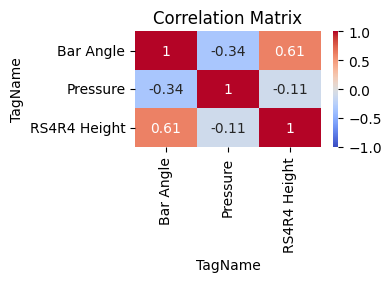

In [123]:
df = reads_parquet(filename)
df = drops_null(df)
df = drops_duplicate(df)
display(df.head(2))

df_pivot = pivots_data(df)
print(check_nulls_in_col(df_pivot))
display(df_pivot.head(2))

df_grouped = groups_data(df_pivot, aggr_freq_l1)
print(check_nulls_in_col(df_grouped))
display(df_grouped.head(2))

df_grouped = drops_null(df_grouped)
df_grouped = df_grouped.reset_index().sort_values(by=datetime, ascending=True)
display(df_grouped.head(2))

plots_corr(drops_col(df_grouped, [datetime]))

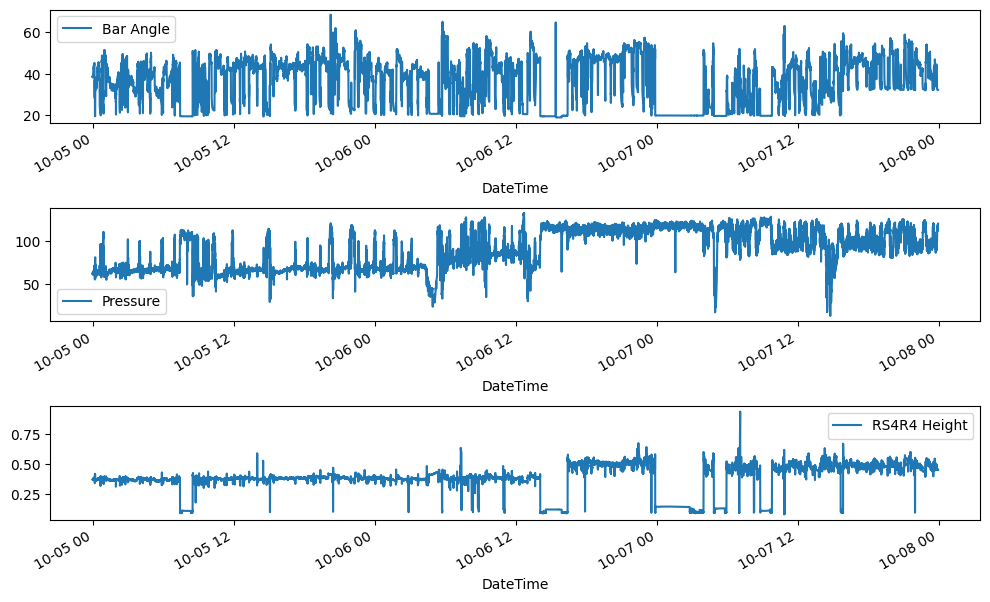

In [128]:
plots_timeseries_data(df_grouped, col_name, datetime)